EMAIL SPAM DETECTION

This is the dataset in which some randomly mails are collected and classified as spam or ham .1st column contains spam/ham classification resr column have the mail itself

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/spam.csv', encoding= 'latin_1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)


In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [9]:
df.shape

(5572, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


TO CHECK DUPLICATES

In [11]:
df.duplicated().sum()

403

In [12]:
dup = df.duplicated()

In [13]:
dup = pd.DataFrame(dup)

In [14]:
dup['label'] = dup[0]
dup

,0,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [15]:
dup.value_counts()


0      label
False  False    5169
True   True      403
dtype: int64

In [16]:
# to print duplicate values
Dup = dup.loc[dup['label'] == True]
Dup

,0,label
102,True,True
153,True,True
206,True,True
222,True,True
325,True,True
...,...,...
5524,True,True
5535,True,True
5539,True,True
5553,True,True


In [17]:
#remove duplicate records
Df = df.drop_duplicates()

In [18]:
# to check data shape after remove duplicate records
Df.shape

(5169, 2)

In [19]:
Df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


[Text(0.5, 1.0, 'A countplot of spam␣and ham categories')]

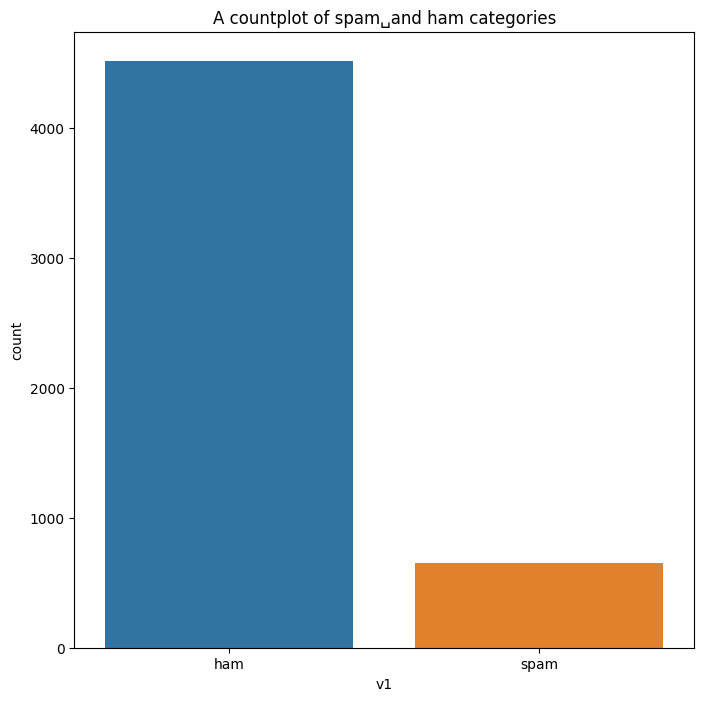

In [20]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'v1', data = Df).set(title = 'A countplot of spam␣and ham categories')

In [21]:
#Rename the columns in given dataset like v1: label, v2:text
Df.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [22]:
Df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
#label encoding for target column label[i.e - ham : 0, spam : 1]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Df['label'] = le.fit_transform(Df['label'])

In [24]:
x = Df['text']
y = Df['label']

In [25]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
x = np.array(x, dtype=str)
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
x = feature_extraction.fit_transform(x)

In [27]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [28]:
x_train

<3618x8404 sparse matrix of type '<class 'numpy.float64'>'
	with 27646 stored elements in Compressed Sparse Row format>

BALANCE THE DATA

The Given data is imbalance. so we use over_sampling method

In [29]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0)
x_train1, y_train1 = ros.fit_resample(x_train,y_train)

<Axes: xlabel='label', ylabel='count'>

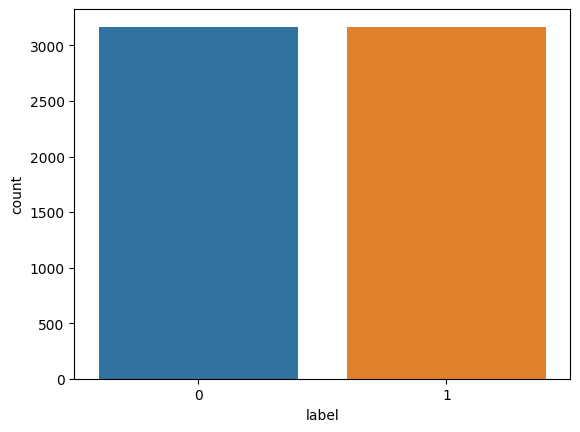

In [30]:
sns.countplot(x = y_train1)

MODEL BUILDINGS

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
#Using Logistic Regression
lr = LogisticRegression()
lr.fit(x_train1,y_train1)

LogisticRegression()

In [33]:
lr_pred = lr.predict(x_test)

In [34]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [35]:
print('Confusion matrix: ', '\n', confusion_matrix(lr_pred,y_test))
print('Accuracy score: ', accuracy_score(lr_pred,y_test))
print(classification_report(lr_pred,y_test))

Confusion matrix:  
 [[1338   33]
 [  10  170]]
Accuracy score:  0.9722759509993553
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1371
           1       0.84      0.94      0.89       180

    accuracy                           0.97      1551
   macro avg       0.92      0.96      0.94      1551
weighted avg       0.97      0.97      0.97      1551



In [36]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train1, y_train1)

SVC()

In [37]:
sv_pred = sv.predict(x_test)

In [38]:
print('Confusion matrix: ', '\n', confusion_matrix(sv_pred,y_test))
print('Accuracy score: ', accuracy_score(sv_pred,y_test))
print(classification_report(sv_pred,y_test))

Confusion matrix:  
 [[1347   61]
 [   1  142]]
Accuracy score:  0.9600257898130239
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1408
           1       0.70      0.99      0.82       143

    accuracy                           0.96      1551
   macro avg       0.85      0.97      0.90      1551
weighted avg       0.97      0.96      0.96      1551



RANDOM FOREST MODEL

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train1, y_train1)

RandomForestClassifier()

In [40]:
rf_pred = rf.predict(x_test)


In [41]:
print('Confusion matrix: ', '\n', confusion_matrix(rf_pred,y_test))
print('Accuracy score: ', accuracy_score(rf_pred,y_test))
print(classification_report(rf_pred,y_test))

Confusion matrix:  
 [[1346   45]
 [   2  158]]
Accuracy score:  0.9696969696969697
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1391
           1       0.78      0.99      0.87       160

    accuracy                           0.97      1551
   macro avg       0.89      0.98      0.93      1551
weighted avg       0.98      0.97      0.97      1551



DECISION TREE MODEL

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth =  15,min_samples_leaf = 1,min_samples_split= 4)
dt.fit(x_train1,y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=4)

In [43]:
dt_pred = dt.predict(x_test)


In [44]:
print('Confusion matrix: ', '\n', confusion_matrix(dt_pred,y_test))
print('Accuracy score: ', accuracy_score(dt_pred,y_test))
print(classification_report(dt_pred,y_test))

Confusion matrix:  
 [[1331   56]
 [  17  147]]
Accuracy score:  0.9529335912314636
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1387
           1       0.72      0.90      0.80       164

    accuracy                           0.95      1551
   macro avg       0.86      0.93      0.89      1551
weighted avg       0.96      0.95      0.96      1551



Using the above models to predict some message.

For the prediction, 0 represents not spam and 1 represents spam.

In [45]:
msg = ['Better. Made up for Friday and stuffed myself like a pig yesterday. Now I feel bleh. But, at least, its not writhing pain kind of bleh.']
msg = feature_extraction.transform(msg)

In [46]:
lr.predict(msg)

array([0])

In [47]:
rf.predict(msg)

array([0])

In [48]:
sv.predict(msg)

array([0])

So,the given above msg, all models have been able to tell that the message is not spam msg

In [49]:
msg1 = ['Congratulations ur awarded 500 of CD vouchers or 125 gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066.']
msg1 = feature_extraction.transform(msg1)

In [50]:
lr.predict(msg1)

array([1])

In [51]:
rf.predict(msg1)

array([1])

In [52]:
dt.predict(msg1)

array([1])

The above msg all models have been able to tell that the message is spam